In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
import pydot

from io import StringIO
import os

In [28]:

# The integer values for features will take
# a range from 0 to n-1 in the lists of possible values:
input_labels = [
    ["buying", ["vhigh", "high", "med", "low"]],
    ["maint", ["vhigh", "high", "med", "low"]],
    ["doors", ["2", "3", "4", "5more"]],  # Here indexes are not real values
    ["persons", ["2", "4", "more"]],
    ["lug_boot", ["small", "med", "big"]],
    ["safety", ["low", "med", "high"]],
]
class_names = ["unacc", "acc", "good", "vgood"]

In [32]:
# Load data set
data = np.genfromtxt(os.path.join('data', 'car.data'), delimiter=',', dtype="U")
data_inputs = data[:, :-1]
data_outputs = data[:, -1]

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [6]:
def str_data_to_one_hot(data, input_labels):
    """Convert each feature's string to a flattened one-hot array. """
    X_int = LabelEncoder().fit_transform(data.ravel()).reshape(*data.shape)
    X_bin = OneHotEncoder().fit_transform(X_int).toarray()
    
    feature_names = []
    for a in input_labels:
        key = a[0]
        for b in a[1]:
            value = b
            feature_names.append("{}_is_{}".format(key, value))

    return X_bin, feature_names

In [7]:
def str_data_to_linear(data, input_labels):
    """Convert each feature's string to an integer index"""
    X_lin = np.array([[
        input_labels[a][1].index(j) for a, j in enumerate(i)
    ] for i in data])
    
    # Integer feature indexes will range
    # from 0 to n-1 from indexes in the label list:
    feature_names = [i[0] + "_index" for i in input_labels]
    
    return X_lin, feature_names

In [8]:
# Take both one-hot and linear versions of input features: 
X_one_hot, feature_names_one_hot = str_data_to_one_hot(data_inputs, input_labels)
X_linear_int, feature_names_linear_int = str_data_to_linear(data_inputs, input_labels)

In [9]:
# Put that together:
X = np.concatenate([X_one_hot, X_linear_int], axis=-1)
feature_names = feature_names_one_hot + feature_names_linear_int

In [10]:
# Outputs use indexes, this is not one-hot:
integer_y = np.array([class_names.index(i) for i in data_outputs])

print("Data set's shape,")
print("X.shape, integer_y.shape, len(feature_names), len(class_names):")
print(X.shape, integer_y.shape, len(feature_names), len(class_names))

Data set's shape,
X.shape, integer_y.shape, len(feature_names), len(class_names):
(1728, 27) (1728,) 27 4


In [11]:

max_depth = 6
clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X, integer_y)

print("Decision tree trained!")
accuracy = clf.score(X, integer_y)
print("Errors:", 100 - accuracy * 100, "%")
print("Accuracy:", accuracy * 100, "%")

Decision tree trained!
Errors: 6.539351851851848 %
Accuracy: 93.46064814814815 %


In [15]:

def plot_first_tree(clf, class_names, tree_name):
    """
    Plot and save our scikit-learn tree.
    """
    graph_save_path = os.path.join(
        "data", 
        "{}".format(tree_name)
    )

    tree.export_graphviz(clf, out_file="{}.dot".format(graph_save_path))
    dotfile = StringIO()
    tree.export_graphviz(
        clf, out_file=dotfile,
        feature_names=feature_names, class_names=class_names,
        filled=True, rotate=True
    )
    pydot.graph_from_dot_data(dotfile.getvalue())[0].write_png("{}.png".format(graph_save_path))

In [16]:
# Plot our simple tree:
plot_first_tree(clf, class_names, tree_name="simple_tree")

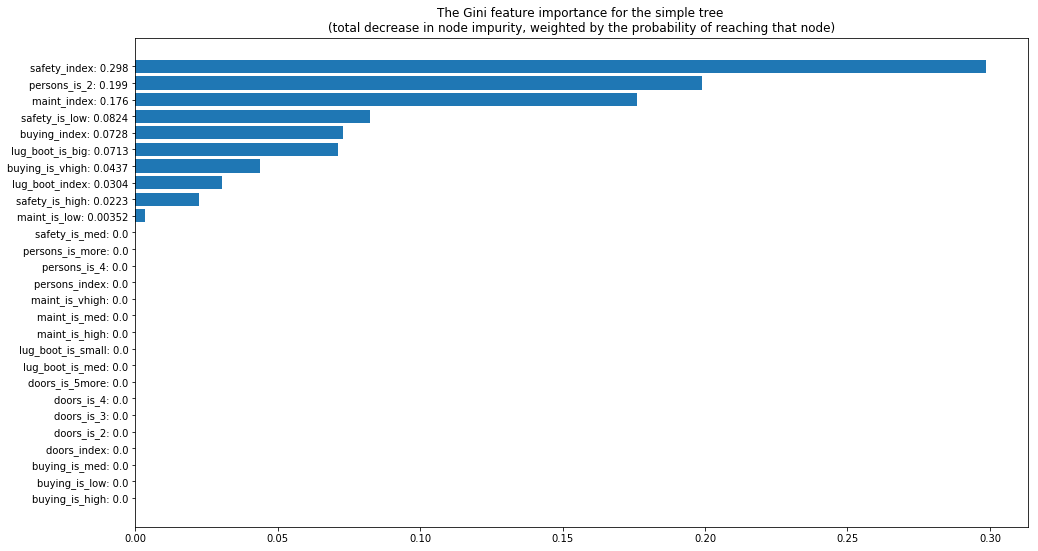

In [19]:
def feature_importance_chart(clf, classifier_name, feature_names):
    sorted_feature_importances, sorted_feature_names = (
        zip(*sorted(zip(clf.feature_importances_, feature_names)))
    )
    plt.figure(figsize=(16, 9))
    plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances)
    plt.yticks(
        range(len(sorted_feature_importances)),
        ["{}: {:.3}".format(a, b) for a, b in zip(sorted_feature_names, sorted_feature_importances)]
    )
    plt.title("The Gini feature importance for the {} \n"
              "(total decrease in node impurity, weighted by the "
              "probability of reaching that node)".format(classifier_name))
    plt.show()

feature_importance_chart(clf, "simple tree", feature_names)

In [21]:
# Plot the importance of each input features of the simple tree:


In [22]:

max_depth = None  # Full depth
clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X, integer_y)

print("Decision tree trained!")
accuracy = clf.score(X, integer_y)
print("Errors:", 100 - accuracy * 100, "%")
print("Accuracy:", accuracy * 100, "%")

Decision tree trained!
Errors: 0.0 %
Accuracy: 100.0 %


In [23]:
plot_first_tree(clf, class_names, tree_name="complex_tree")

In [25]:
# Finally, the full feature importance:

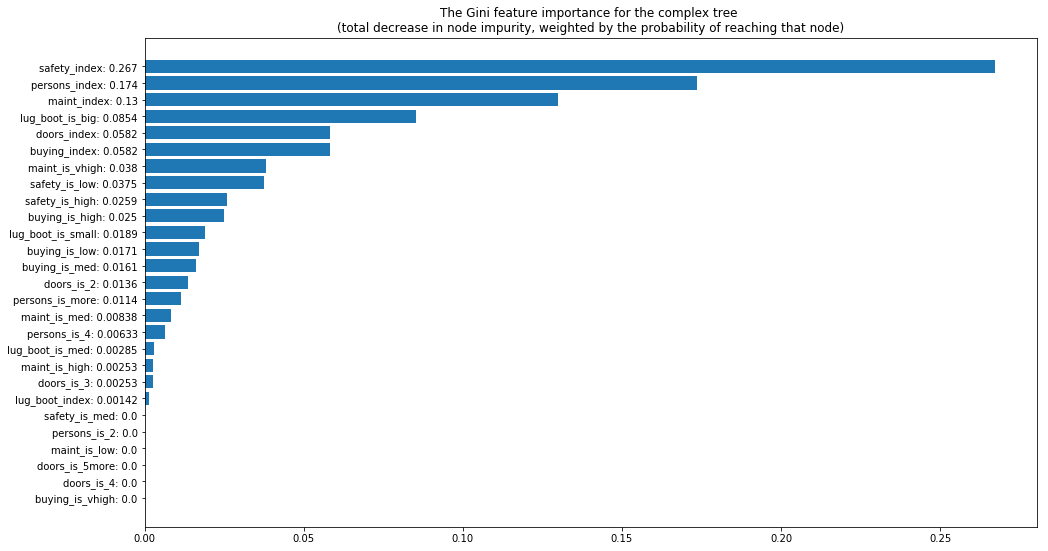

In [26]:
feature_importance_chart(clf, "complex tree", feature_names)